## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## IMPORTING DATASET

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

## DATA CLEANING

In [3]:
df.head()

# WE CAM ALREADY SEE THAT THERE IS A LOT OF NULL VAUES IN THE COLUMNS

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# THE NUMBER OF NULL VALUES IN THE COLUMNS

df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

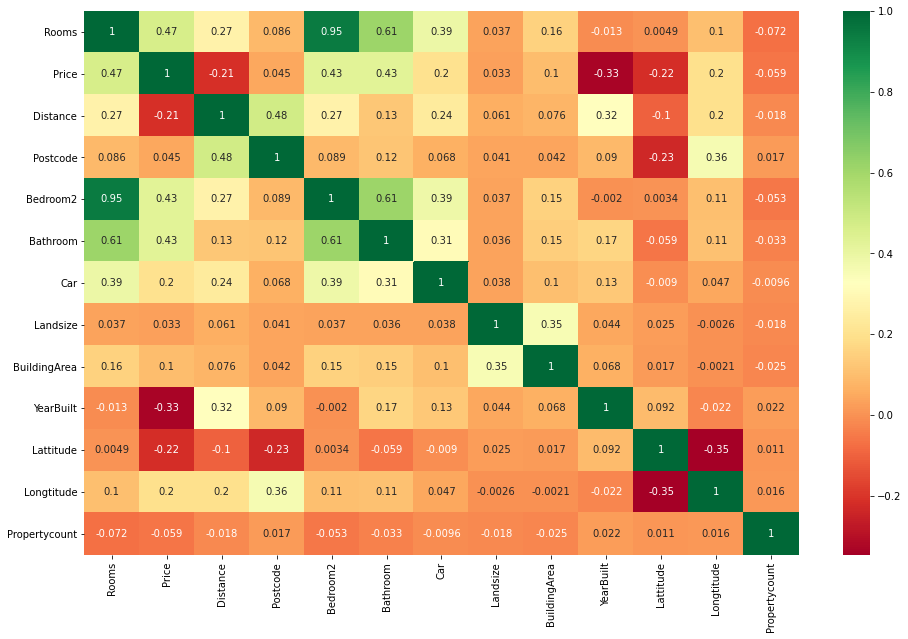

In [5]:
plt.subplots(figsize=(16,10))
sns.heatmap(df.corr(), data = df, annot=True, cmap='RdYlGn')
plt.show()

In [6]:
df.drop('Bedroom2', axis = 1, inplace = True)

In [7]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
# Dropping all the null values from the dataset

df.dropna(inplace=True)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.0,3.098909e+00,0.963786,1.00000,2.00000,3.0000,4.000000e+00,1.200000e+01
Price,8887.0,1.092902e+06,679381.904112,131000.00000,641000.00000,900000.0000,1.345000e+06,9.000000e+06
Distance,8887.0,1.119989e+01,6.813402,0.00000,6.40000,10.2000,1.390000e+01,4.740000e+01
Postcode,8887.0,3.111663e+03,112.614268,3000.00000,3044.00000,3084.0000,3.150000e+03,3.977000e+03
Bathroom,8887.0,1.646450e+00,0.721611,1.00000,1.00000,2.0000,2.000000e+00,9.000000e+00
Car,8887.0,1.692247e+00,0.975464,0.00000,1.00000,2.0000,2.000000e+00,1.000000e+01
Landsize,8887.0,5.234804e+02,1061.324228,0.00000,212.00000,478.0000,6.520000e+02,4.280000e+04
BuildingArea,8887.0,1.493095e+02,87.925580,0.00000,100.00000,132.0000,1.800000e+02,3.112000e+03
YearBuilt,8887.0,1.965753e+03,37.040876,1196.00000,1945.00000,1970.0000,2.000000e+03,2.019000e+03
Lattitude,8887.0,-3.780450e+01,0.090549,-38.17436,-37.85856,-37.7987,-3.774894e+01,-3.740720e+01


## REMOVAL OF OUTLIERS

### Since we can see that the minimum value of BuildingArea and Landsize is zero which needs further investigation

### Landsize being zero can mean that it is a Zero-lot-line house which is a piece of residential real estate in which the structure comes up to, or very near to, the edge of the property line. 

### Rowhouses, garden homes, patio homes, and townhomes are all types of properties that may be zero-lot-line homes. They may be attached (as in a townhouse) or a detached single story or multistory residence.

### So yes , landsize of a house/property can be zero .

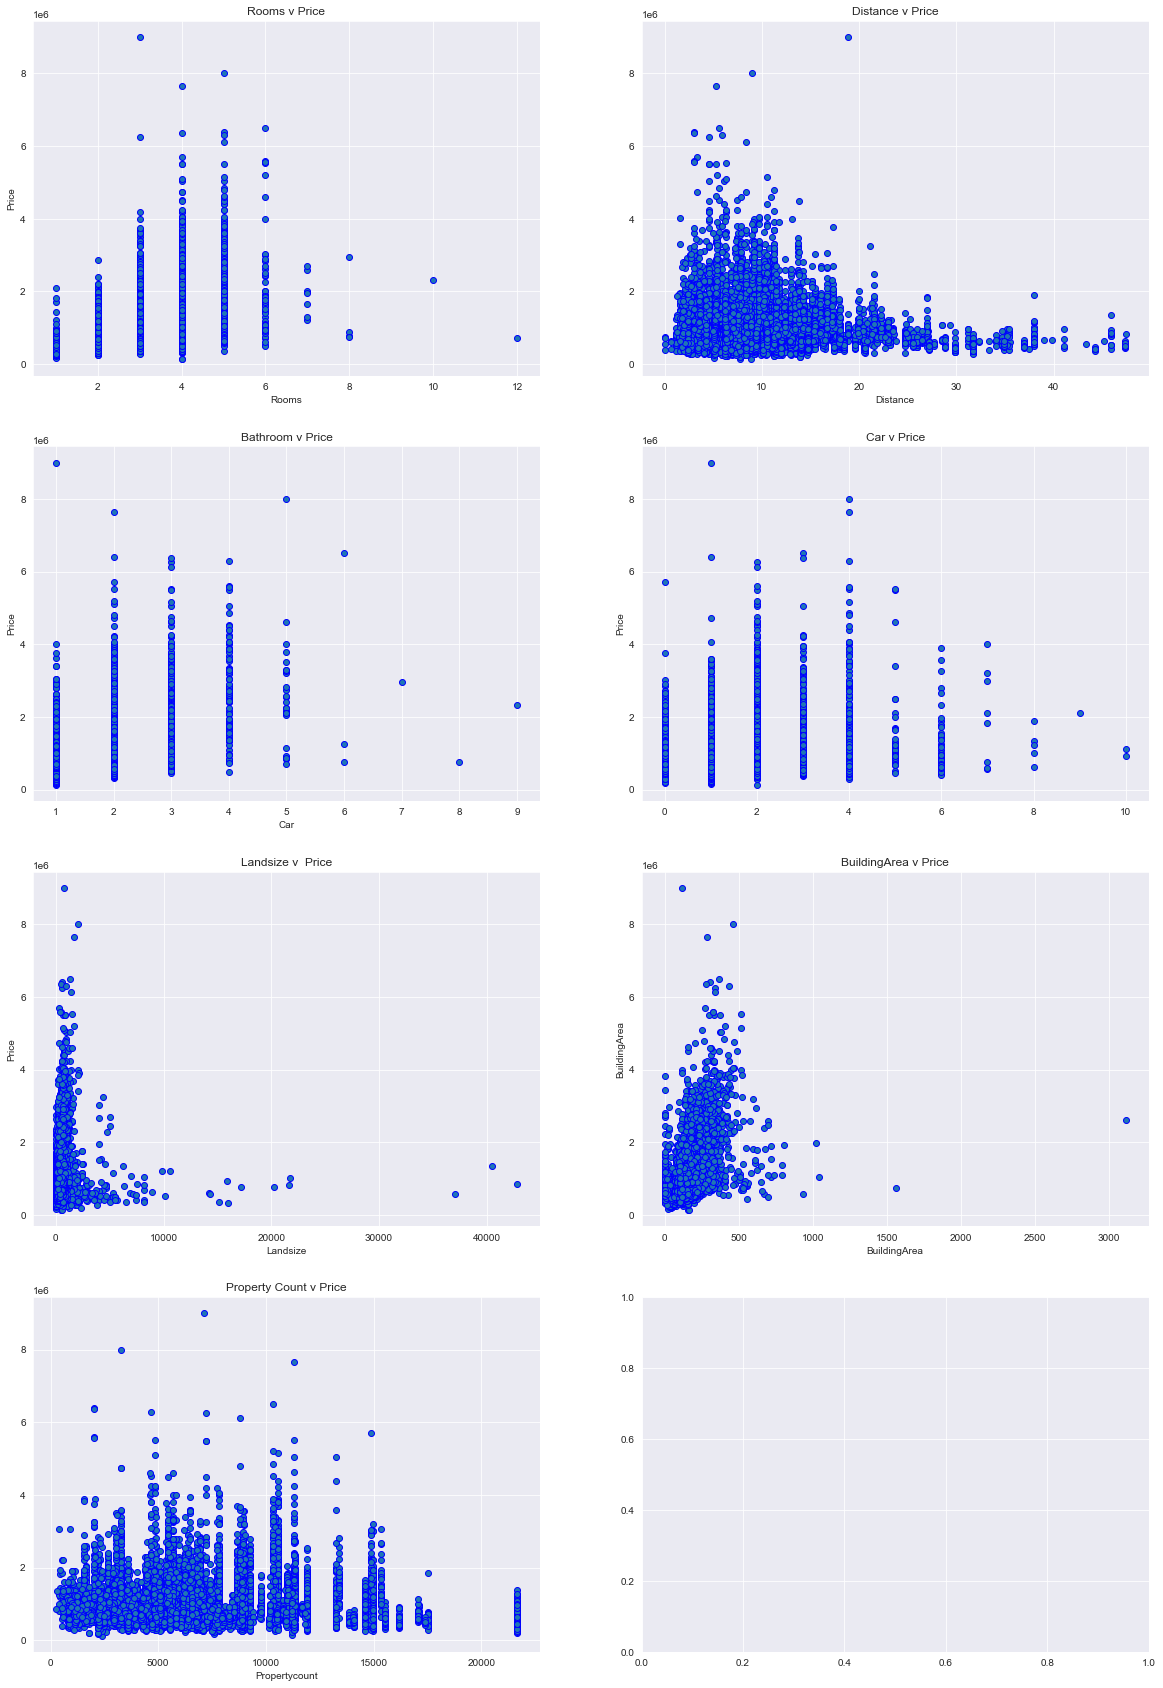

In [10]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = df, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = df, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = df, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = df, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')


# Plot [3,0]
axes[3,0].scatter(x = 'Propertycount', y = 'Price', data = df, edgecolor = 'b')
axes[3,0].set_xlabel('Propertycount')
#axes[3,0].set_ylabel('Price')
axes[3,0].set_title('Property Count v Price')

plt.show()

In [11]:
col = 'Landsize'
IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
lower_bound = df[col].quantile(0.25)-(IQR*1.5)
upper_bound = df[col].quantile(0.25)+(IQR*1.5)

print("The outliers in {} feature are values <<{} and {}>>".format(col, lower_bound, upper_bound))

minimum = df[col].min()
maximum = df[col].max()

print("The minimum value in {} is {} and maximum value is {}".format(col, minimum, maximum))

print("\nMaximum value is greater than the upper bound limit")
print("Thus outliers are values greater than the upper limit")


number_out = len(df[df['Landsize'] > upper_bound])

print("There are {} outliers in {} feature".format(number_out, col))

The outliers in Landsize feature are values <<-448.0 and 872.0>>
The minimum value in Landsize is 0.0 and maximum value is 42800.0

Maximum value is greater than the upper bound limit
Thus outliers are values greater than the upper limit
There are 601 outliers in Landsize feature


In [12]:
fig = px.box(df, y= 'Landsize', width = 800, title = 'Before capping outliers')
fig.show()

In [13]:
df['Landsize'] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [14]:
fig = px.box(df, y = 'Landsize', width = 800, title = 'After capping the outliers')
fig.show()

In [15]:
# Getting rid of the price outliers

Q1_p = df['Price'].quantile(0.25)
Q3_p = df['Price'].quantile(0.75)
IQR_p = Q3_p-Q1_p
Lower_Whisker_p = Q1_p - 1.5*IQR_p
Upper_Whisker_p = Q3_p + 1.5*IQR_p

df = df[(df['Price']>Lower_Whisker_p)&(df['Price']<Upper_Whisker_p)]


## CLUSTERING OF DATA

In [16]:
# Making a copy of the dataframe and dropping the price column

df_copy = df.copy()

In [17]:
from sklearn import preprocessing

# Clustering based on the following parameters
df_imp = df_copy[['Rooms','Distance','Landsize','Propertycount']]
# df_imp = df_copy[['Rooms','Propertycount','Landsize']]

x = df_imp
min_max_scalar = preprocessing.MinMaxScaler()
x_scaled = min_max_scalar.fit_transform(x)

scaledX = pd.DataFrame(x_scaled)

In [18]:
scaledX

,0,1,2,3
0,0.090909,0.052743,0.178899,0.176160
1,0.181818,0.052743,0.153670,0.176160
2,0.272727,0.052743,0.137615,0.176160
3,0.181818,0.052743,0.280963,0.176160
4,0.090909,0.052743,0.293578,0.176160
...,...,...,...,...
8462,0.181818,0.537975,0.439220,0.125742
8463,0.181818,0.537975,0.463303,0.125742
8464,0.090909,0.132911,0.112385,0.294098
8465,0.090909,0.132911,0.252294,0.294098


In [19]:
# Choosing optimal k

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt



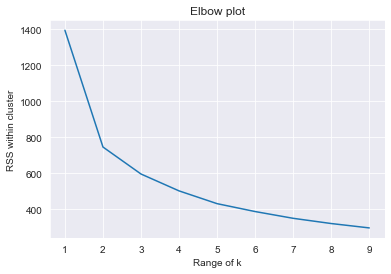

In [20]:
# Using K-Means for clustering

k_range = range(1, 10)

k_means_var = [KMeans(n_clusters= k).fit(scaledX) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

k_euclid = [cdist(scaledX, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# # Calculate within cluster sum of squares

wcss = [sum(d**2) for d in dist]

# # Visualizing the elbow method for determining k

plt.plot(k_range, wcss)
plt.xlabel('Range of k')
plt.ylabel('RSS within cluster')
plt.title('Elbow plot')
plt.show()


In [21]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaledX)
labels = kmeans.labels_
# #Glue back to originaal data
df['clusters'] = labels
df2 = df.rename(columns = {0 : 'Lattitude', 1: 'Longtitude'})

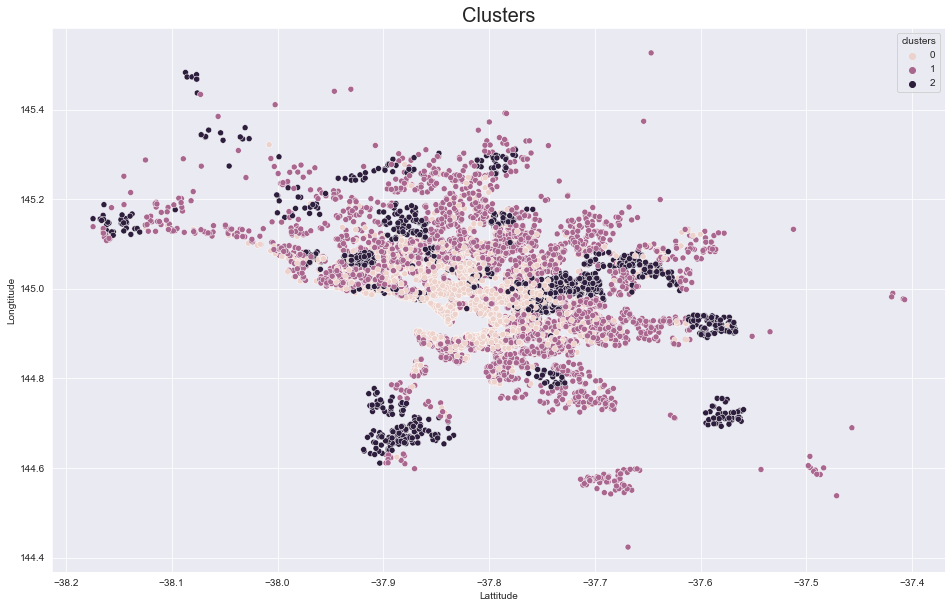

In [22]:
# PLOTTING THE CLUSTERS 

fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.scatterplot(data=df, x='Lattitude', y='Longtitude', hue='clusters')
plt.title('Clusters', size = 20)
plt.show()

In [23]:
# CREATING SEPARATE DATAFRAMES FOR THE THREE CLUSTERS

cluster_0 = df[df["clusters"] == 0]
cluster_1 = df[df["clusters"] == 1]
cluster_2 = df[df["clusters"] == 2]



In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

DF Intercept : 406361.3835278003
DF Coefficients : [193460.27563593 -33002.86334606 121803.31957977    405.64212891]
R2 Score DF: 
0.41693850389980325
***************
RMSE value DF: 
362879.30117910355


C:\Users\tahir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(0.0, 2527563.7088762145)

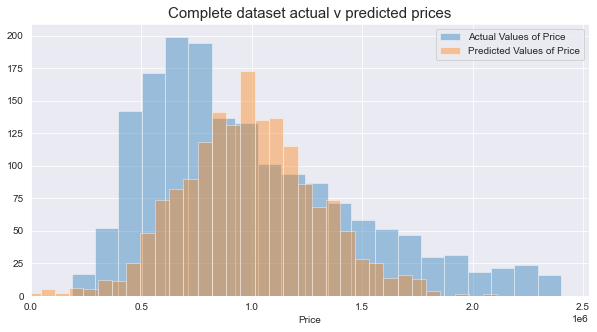

In [25]:
# REGRESSION OF THE COMPLETE DATASET INCLUDING ALL THE CLUSTERS

X = df[['Rooms','Distance','Bathroom','Landsize']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print("DF Intercept : " + str(regr.intercept_))
print("DF Coefficients : " + str(regr.coef_))
y_pred = regr.predict(X_test)
print("R2 Score DF: ")
print(r2_score(y_test, y_pred))
print("*"*15)
print("RMSE value DF: ")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(10,5))
sns.distplot(y_test, hist=True, kde=False)
sns.distplot(y_pred, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.title("Complete dataset actual v predicted prices", size = 15)
plt.xlim(0,)



Cluster 0 Intercept : 425263.0076361493
Cluster 0 Coefficients : [175664.4940889  -42223.66554766 117951.37517247   1197.8738601 ]
R2 Score Cluster 0: 
0.5141576811184652
***************
RMSE value Cluster 0: 
297580.6927183566


C:\Users\tahir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(0.0, 2436782.556117583)

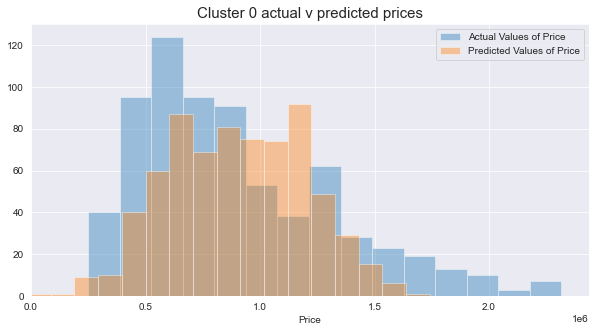

In [31]:
# REGRESSION ANALYSIS FOR CLUSTER 0

X_0 = cluster_0[['Rooms','Distance','Bathroom','Landsize']]
y_0 = cluster_0['Price']

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size = 0.2, random_state = 0)


regr = linear_model.LinearRegression()
regr.fit(X_train_0,y_train_0)
print("Cluster 0 Intercept : " + str(regr.intercept_))
print("Cluster 0 Coefficients : " + str(regr.coef_))

y_pred_0 = regr.predict(X_test_0)

print("R2 Score Cluster 0: ")
print(r2_score(y_test_0, y_pred_0))
print("*"*15)
print("RMSE value Cluster 0: ")
print(np.sqrt(mean_squared_error(y_test_0, y_pred_0)))

plt.figure(figsize=(10,5))
sns.distplot(y_test_0, hist=True, kde=False)
sns.distplot(y_pred_0, hist=True, kde=False)
plt.title("Cluster 0 actual v predicted prices",size = 15)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)


Cluster 1 Intercept : 398432.58772794355
Cluster 1 Coefficients : [179924.97427061 -29570.35807668 137442.43215705    371.99764678]
R2 Score Cluster 1: 
0.3476158382635135
RMSE value Cluster 1: 
387369.6052062058


C:\Users\tahir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(0.0, 2526418.3231275296)

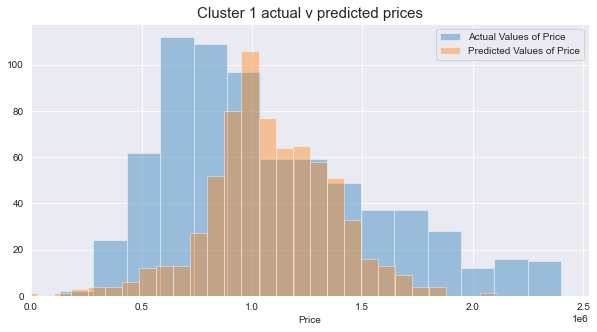

In [27]:
# REGRESSION FOR CLUSTER 1

X_1 = cluster_1[['Rooms','Distance','Bathroom','Landsize']]
y_1 = cluster_1['Price']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.2, random_state = 100)


regr = linear_model.LinearRegression()
regr.fit(X_train_1,y_train_1)
print("Cluster 1 Intercept : " + str(regr.intercept_))
print("Cluster 1 Coefficients : " + str(regr.coef_))

y_pred_1 = regr.predict(X_test_1)

print("R2 Score Cluster 1: ")
print(r2_score(y_test_1, y_pred_1))
print("RMSE value Cluster 1: ")
print(np.sqrt(mean_squared_error(y_test_1, y_pred_1)))

plt.figure(figsize=(10,5))
sns.distplot(y_test_1, hist=True, kde=False)
sns.distplot(y_pred_1, hist=True, kde=False)
plt.title("Cluster 1 actual v predicted prices", size = 15)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)

Cluster 2 Intercept : 417847.520908021
Cluster 2 Coefficients : [185302.13797724 -29337.32868632  97006.36607601    308.55245667]
R2 Score Cluster 2: 
0.3427531231898929
RMSE value Cluster 2: 
370357.94674086594


C:\Users\tahir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(0.0, 2492902.8483737023)

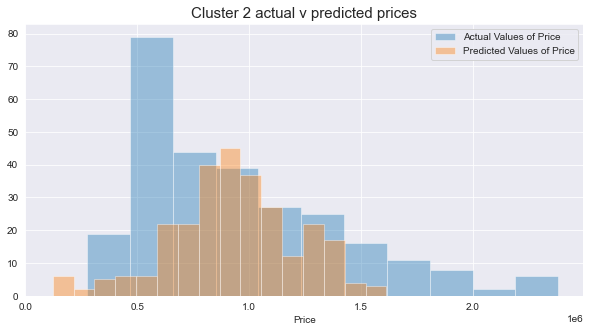

In [28]:
# REGRESSION FOR CLUSTER 2

X_2 = cluster_2[['Rooms','Distance','Bathroom','Landsize']]
y_2 = cluster_2['Price']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)


regr = linear_model.LinearRegression()
regr.fit(X_train_2,y_train_2)
print("Cluster 2 Intercept : " + str(regr.intercept_))
print("Cluster 2 Coefficients : " + str(regr.coef_))

y_pred_2 = regr.predict(X_test_2)

print("R2 Score Cluster 2: ")
print(r2_score(y_test_2, y_pred_2))
print("RMSE value Cluster 2: ")
print(np.sqrt(mean_squared_error(y_test_2, y_pred_2)))

plt.figure(figsize=(10,5))
sns.distplot(y_test_2, hist=True, kde=False)
sns.distplot(y_pred_2, hist=True, kde=False)
plt.title("Cluster 2 actual v predicted prices", size = 15)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,)
